<a href="https://colab.research.google.com/github/bajajrijul/EIP3/blob/master/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [0]:
from fastai.vision import *

In [4]:
path = untar_data("https://s3.amazonaws.com/fast-ai-imageclas/cifar10", dest = './')
path

PosixPath('cifar10')

In [0]:
path.ls()

[PosixPath('cifar10/test'), PosixPath('cifar10/train')]

In [5]:
data = ImageDataBunch.from_folder(path =path, train = 'train', valid = 'test', ds_tfms = get_transforms(), size = 32)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
ship,ship,ship,ship,ship
Path: cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
ship,ship,ship,ship,ship
Path: cifar10;

Test: None

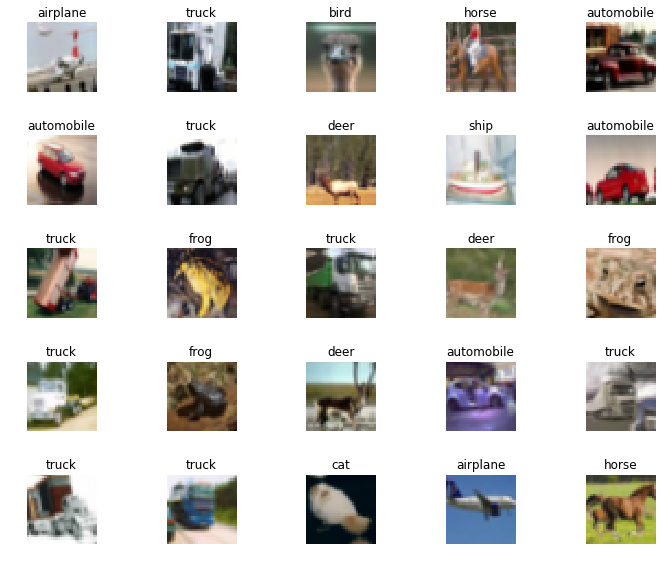

In [0]:
data.show_batch(row = 1, figsize = (10,8))

In [0]:
print(data.classes)
len(data.classes), data.c

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


(10, 10)

In [6]:
learn = cnn_learner(data, models.resnet18, metrics= accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 68093558.01it/s]


In [7]:
learn.model.eval()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [8]:
learn.fit_one_cycle(4)

In [0]:
learn.save('stage-1')

In [0]:
# learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
deer,deer,deer,deer,deer
Path: cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
cat,cat,cat,cat,cat
Path: cifar10;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace

In [0]:
interp = ClassificationInterpretation.from_learner(learn, ds_type = DatasetType.Valid)

In [0]:
# gcam = GradCam.from_interp(learner, interp, )

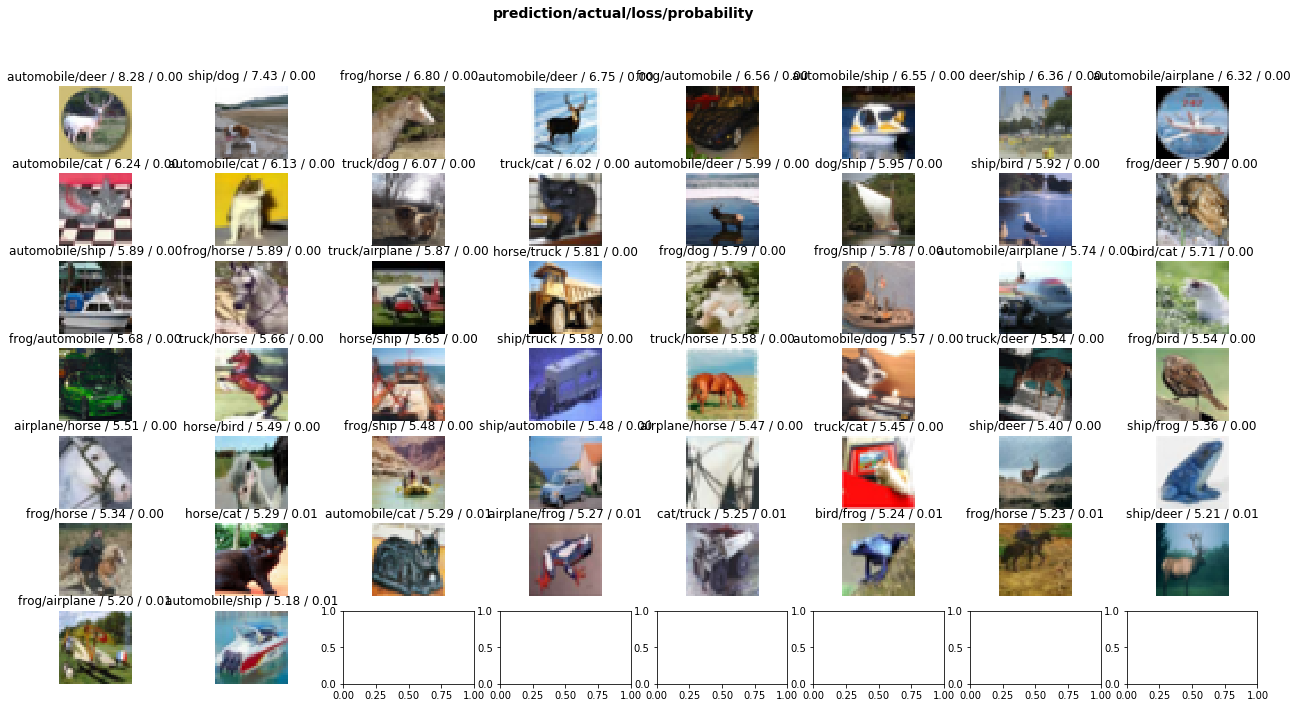

In [10]:
interp.plot_top_losses(50, figsize = (22,11), heatmap = True, heatmap_thresh = 16)

In [17]:
interp.most_confused(min_val = 2)

[('deer', 'frog', 196),
 ('bird', 'frog', 192),
 ('dog', 'cat', 182),
 ('cat', 'frog', 181),
 ('truck', 'automobile', 160),
 ('ship', 'airplane', 141),
 ('automobile', 'truck', 133),
 ('bird', 'airplane', 124),
 ('deer', 'horse', 115),
 ('cat', 'dog', 113),
 ('dog', 'frog', 110),
 ('airplane', 'ship', 108),
 ('ship', 'automobile', 84),
 ('dog', 'horse', 83),
 ('ship', 'truck', 78),
 ('bird', 'deer', 76),
 ('deer', 'bird', 70),
 ('horse', 'deer', 66),
 ('cat', 'horse', 64),
 ('deer', 'cat', 63),
 ('dog', 'bird', 61),
 ('cat', 'bird', 60),
 ('horse', 'cat', 56),
 ('bird', 'cat', 47),
 ('bird', 'dog', 47),
 ('deer', 'airplane', 44),
 ('airplane', 'automobile', 42),
 ('airplane', 'truck', 42),
 ('cat', 'deer', 41),
 ('frog', 'bird', 41),
 ('airplane', 'bird', 40),
 ('truck', 'airplane', 40),
 ('truck', 'ship', 40),
 ('dog', 'deer', 38),
 ('horse', 'dog', 38),
 ('cat', 'truck', 37),
 ('horse', 'truck', 37),
 ('cat', 'automobile', 36),
 ('horse', 'airplane', 34),
 ('bird', 'horse', 30),
 ('h

In [0]:
learn.unfreeze()

In [12]:
learn.fit_one_cycle(1)

In [13]:
def class2idx(clas):
    return data.classes.index(clas)
classes = data.classes
true_idx,pred_idx = class2idx('cat'),class2idx('frog')
mismatch_idxs =[i for i,(tru,pred) in enumerate(zip(data.valid_ds.y.items,interp.pred_class.numpy())) if tru==true_idx and pred==pred_idx]
len(mismatch_idxs)

181

In [0]:
from gradcam import *

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memo

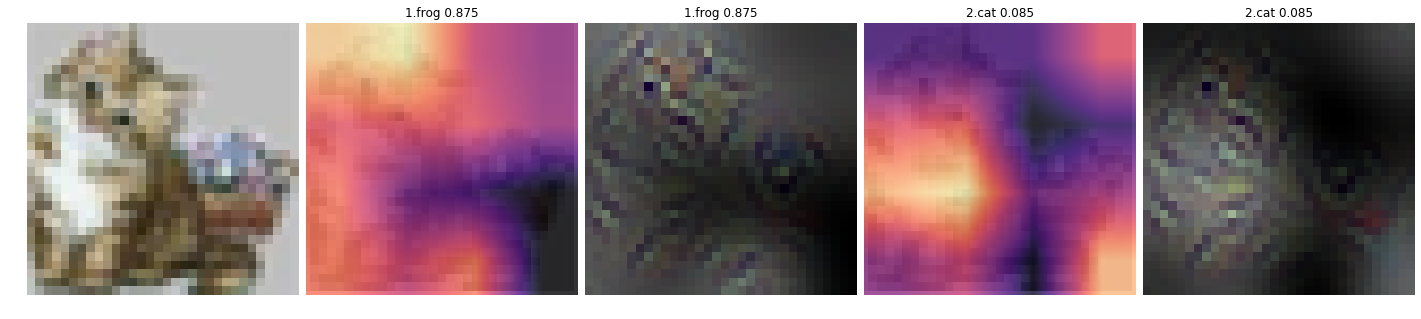

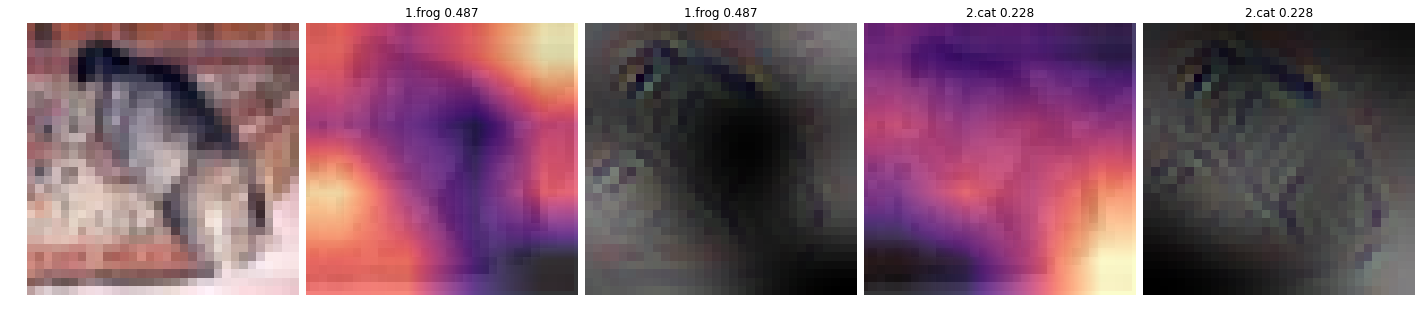

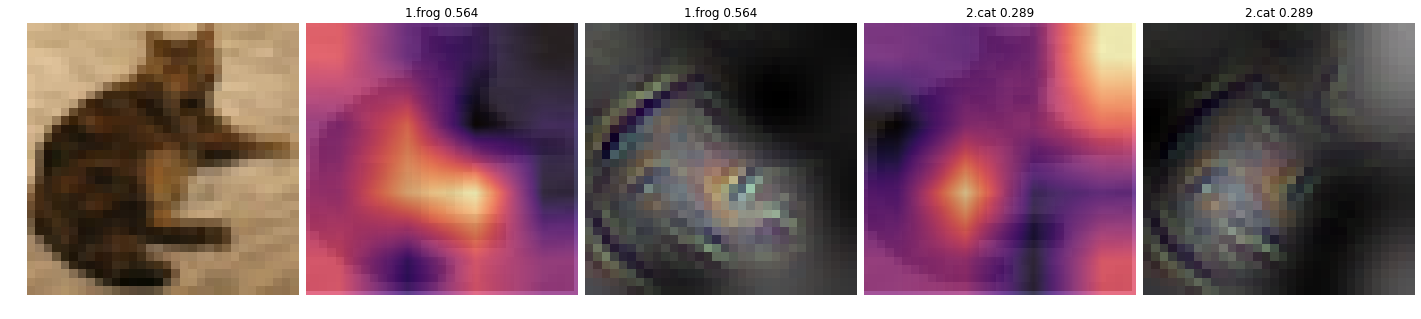

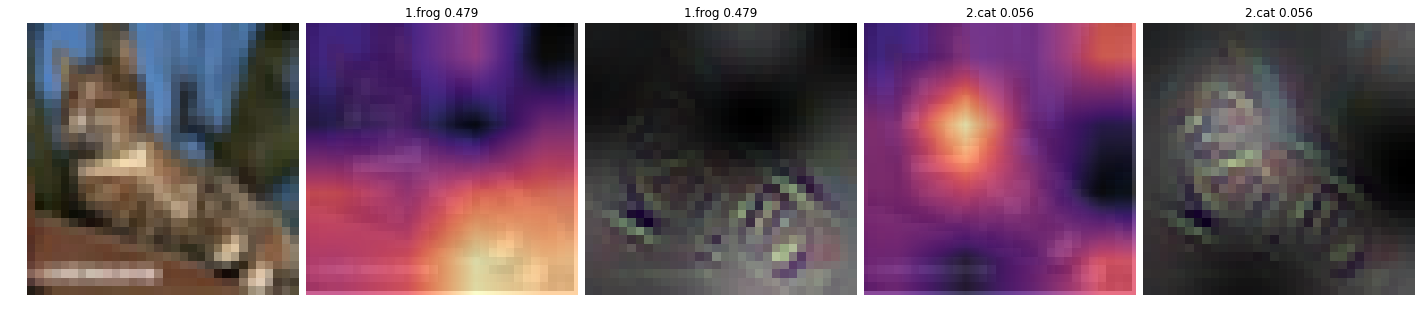

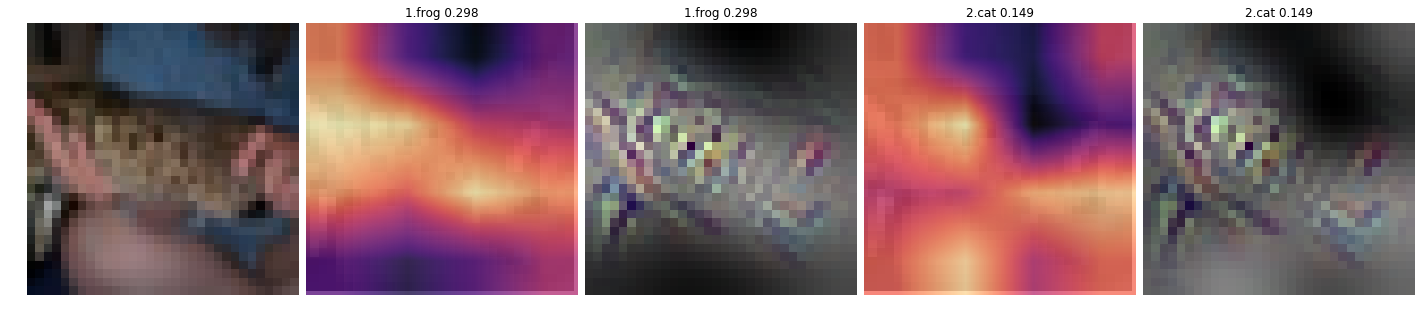

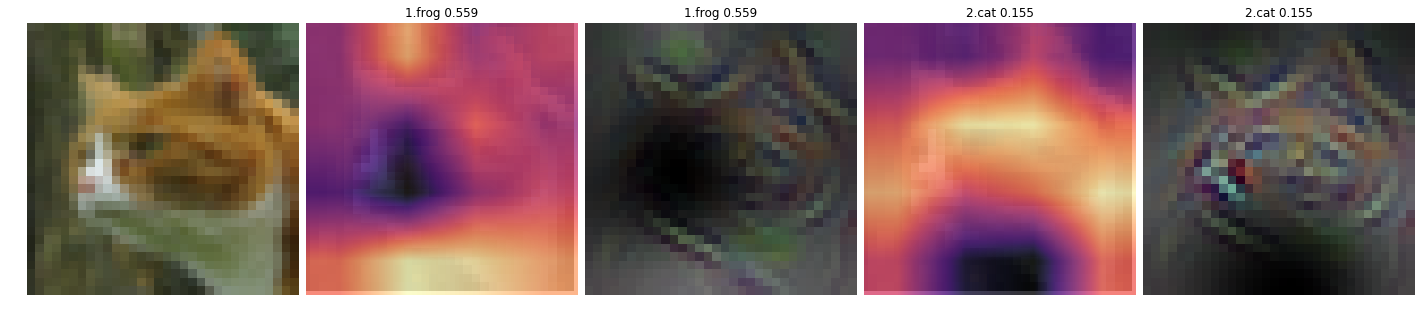

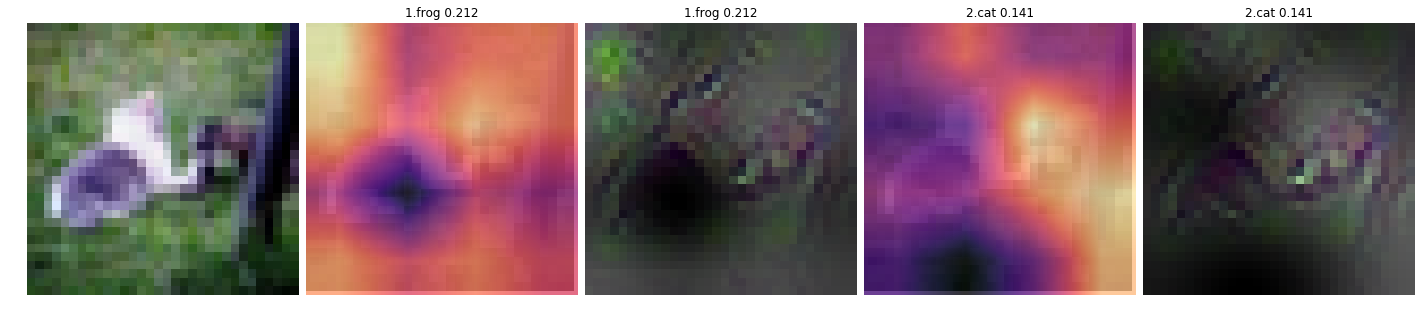

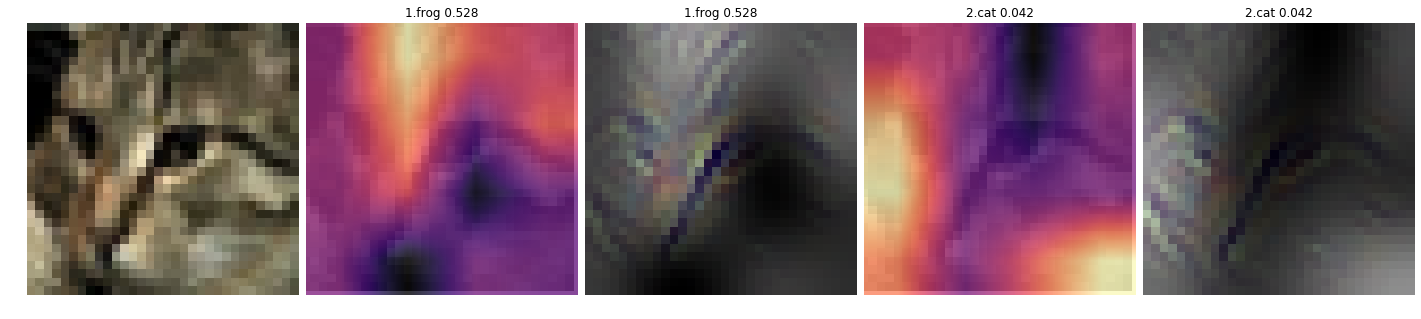

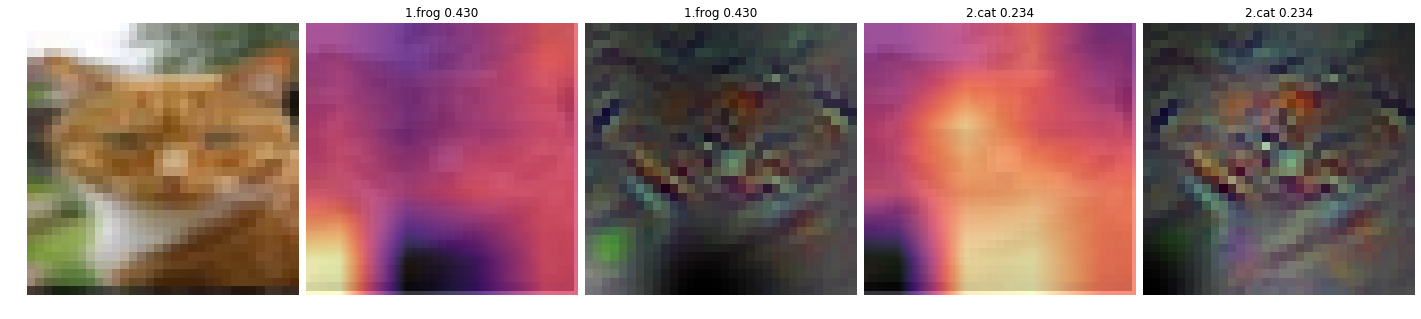

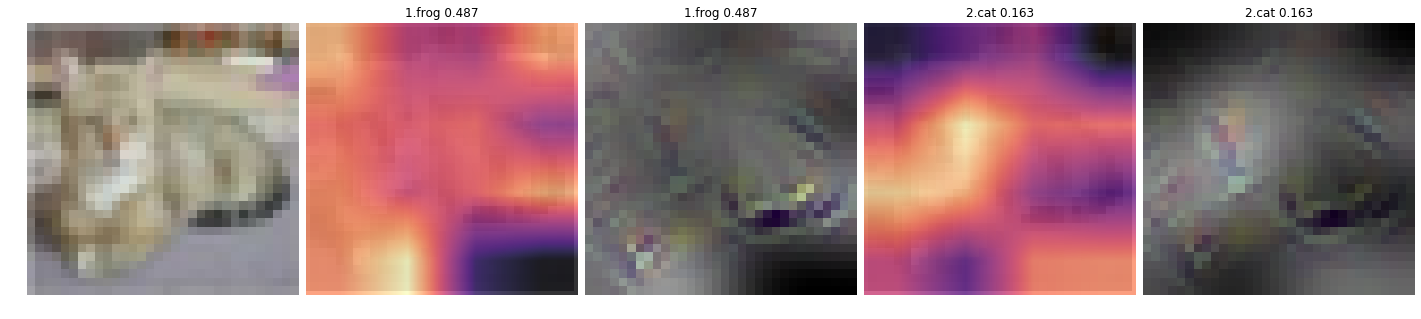

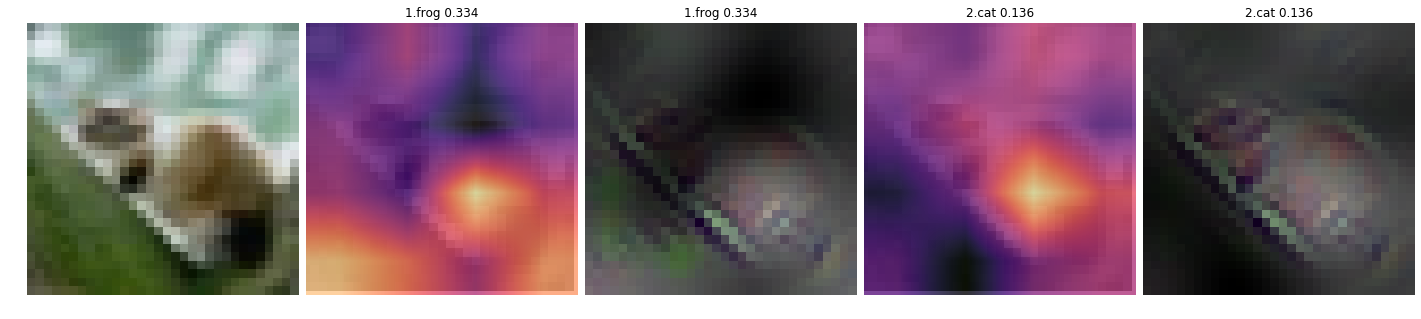

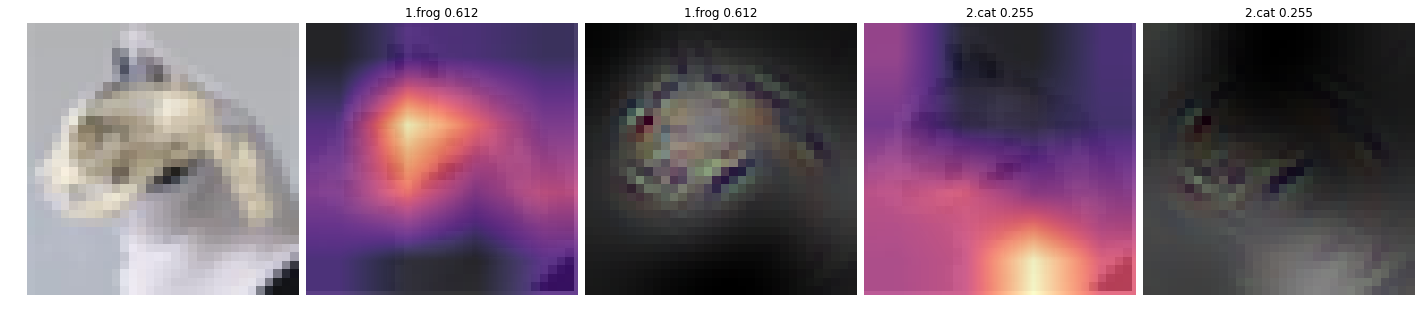

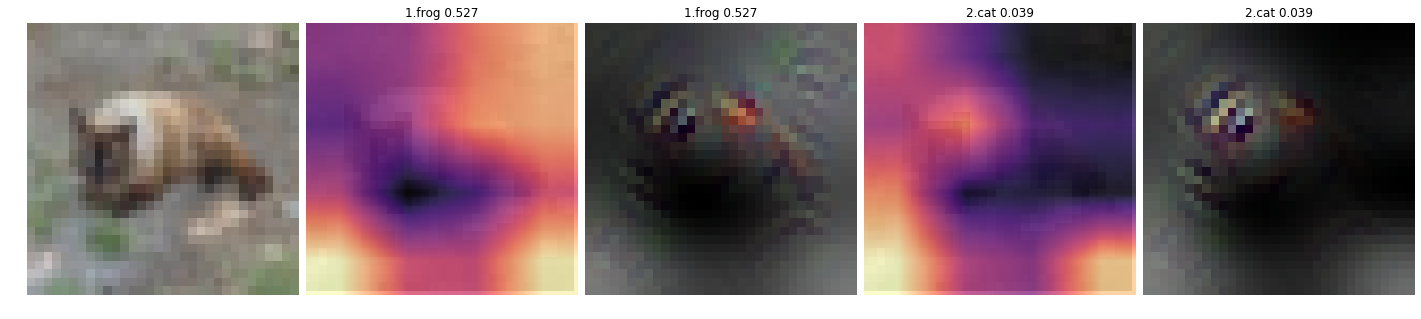

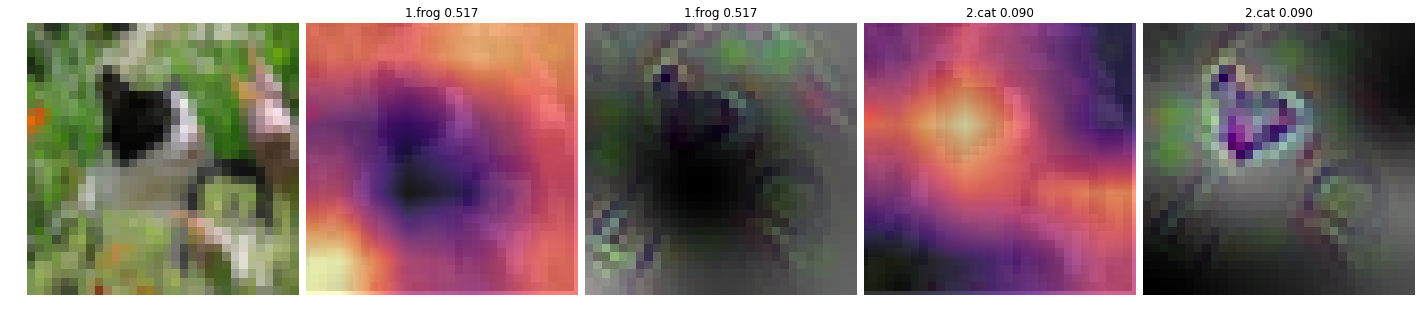

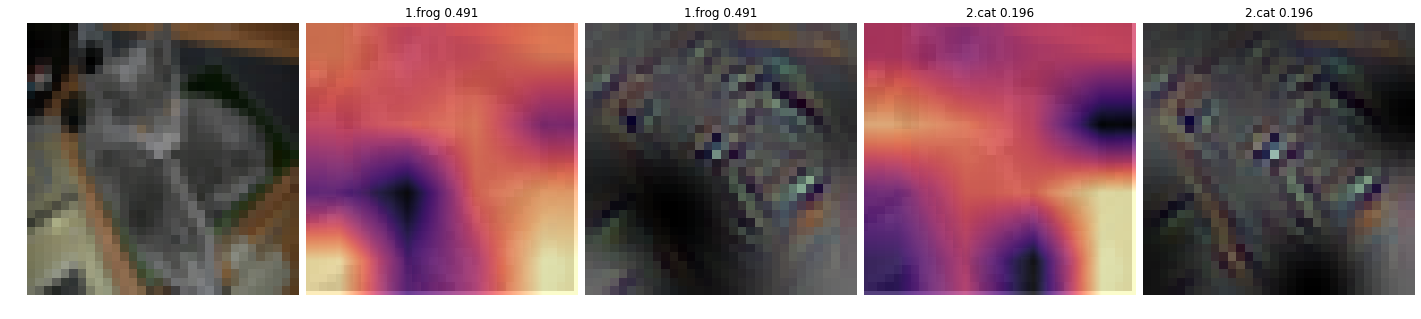

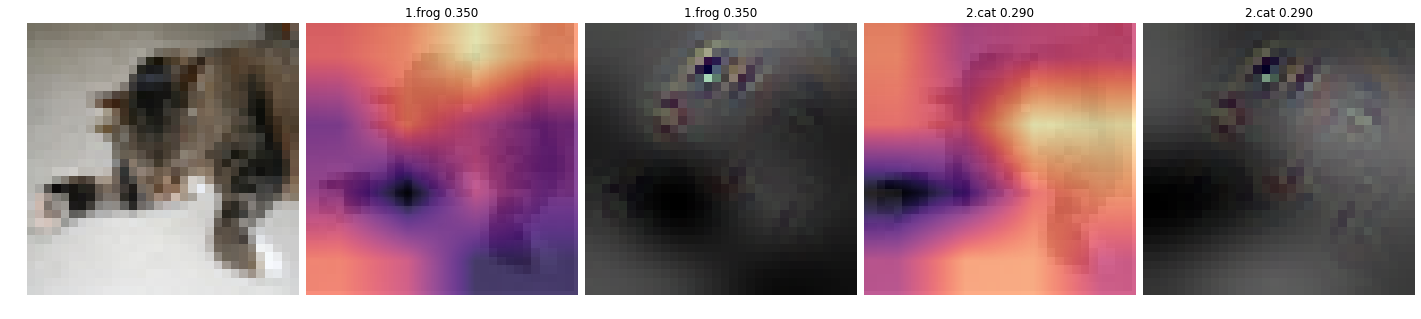

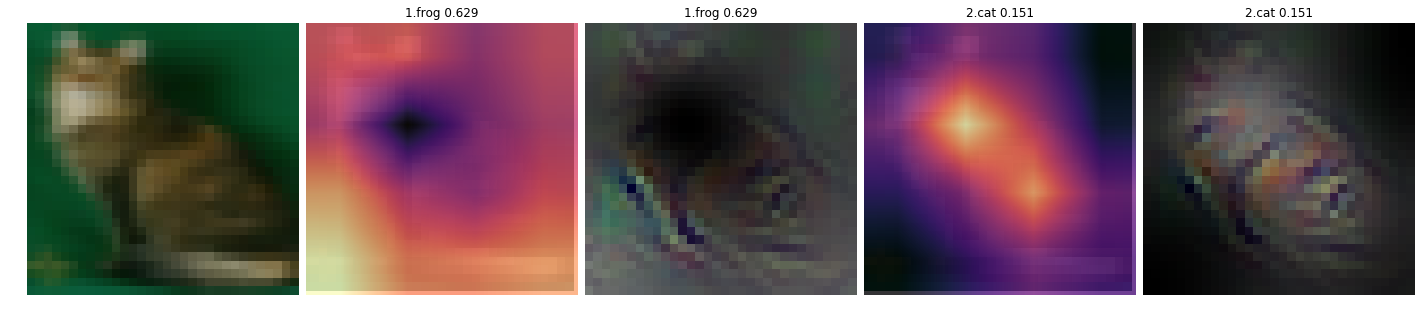

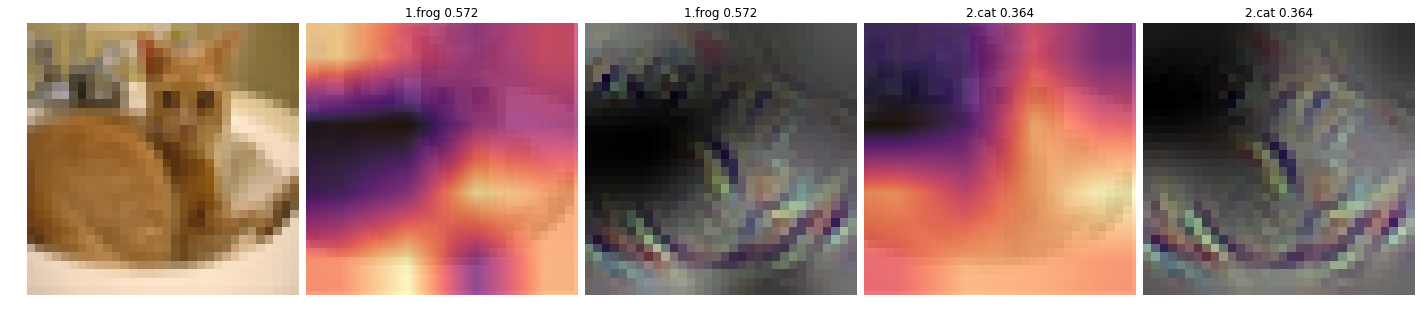

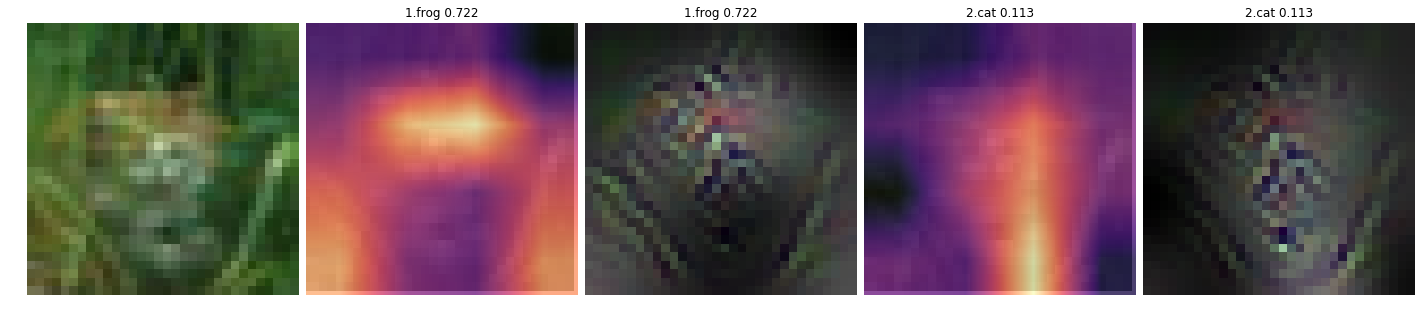

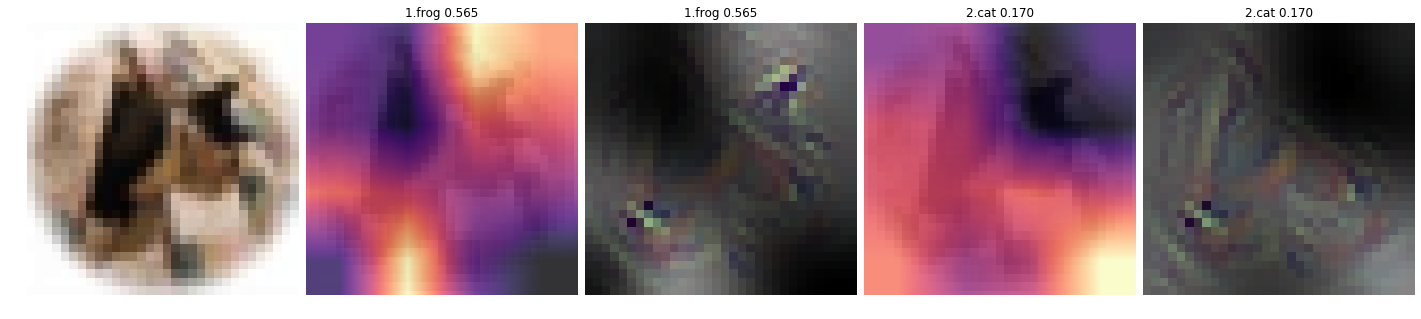

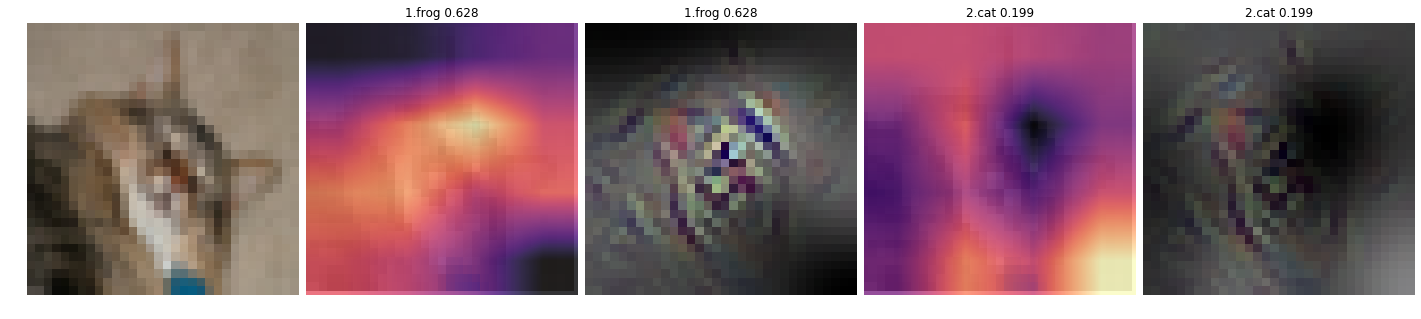

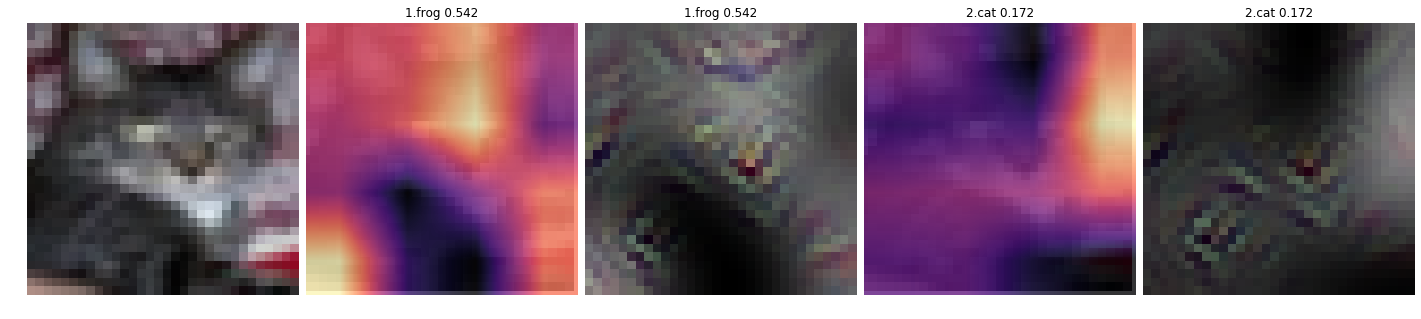

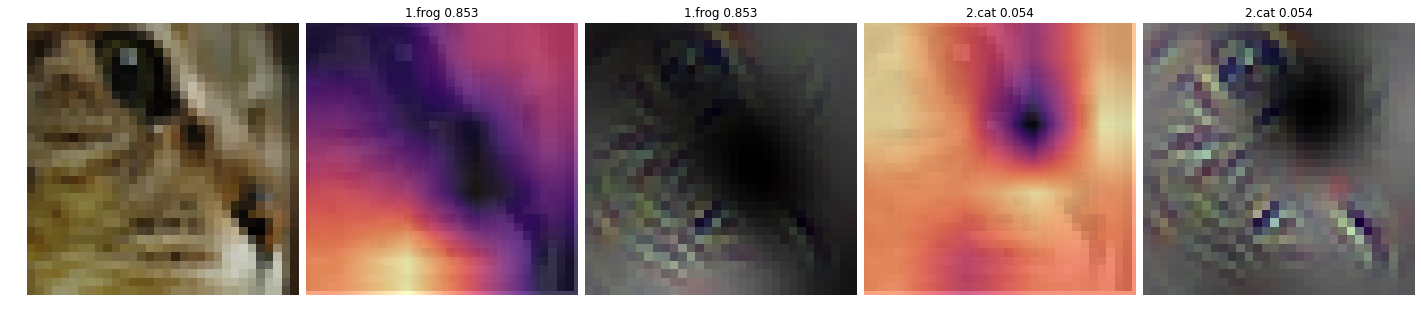

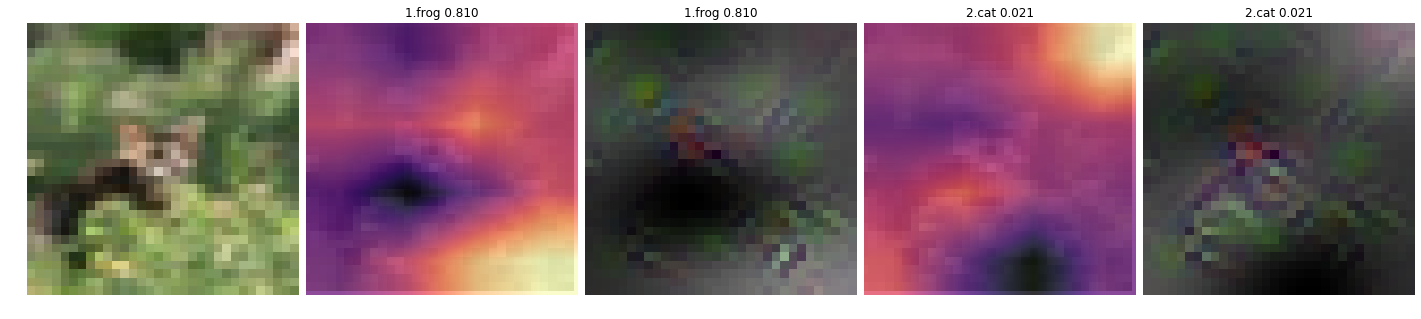

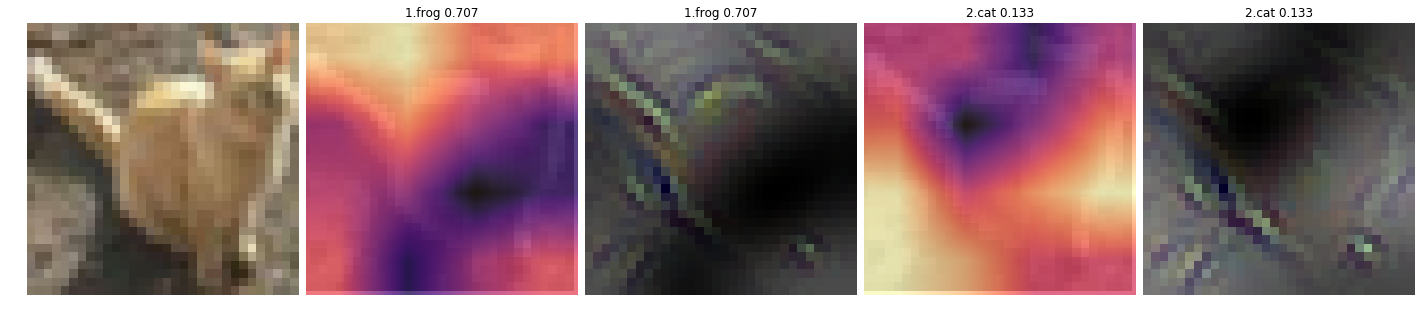

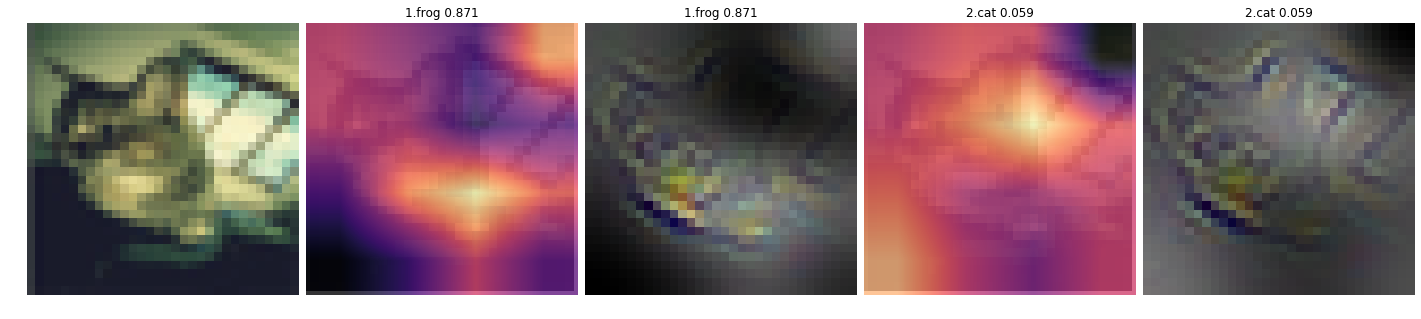

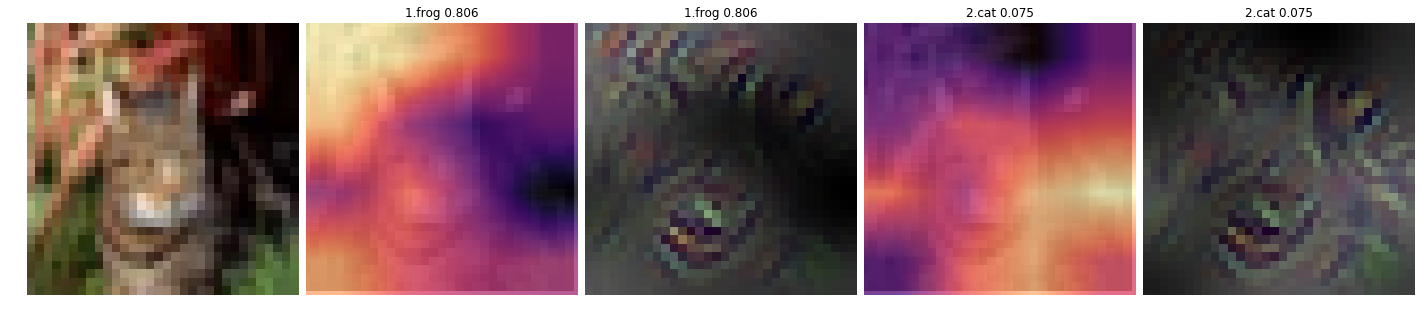

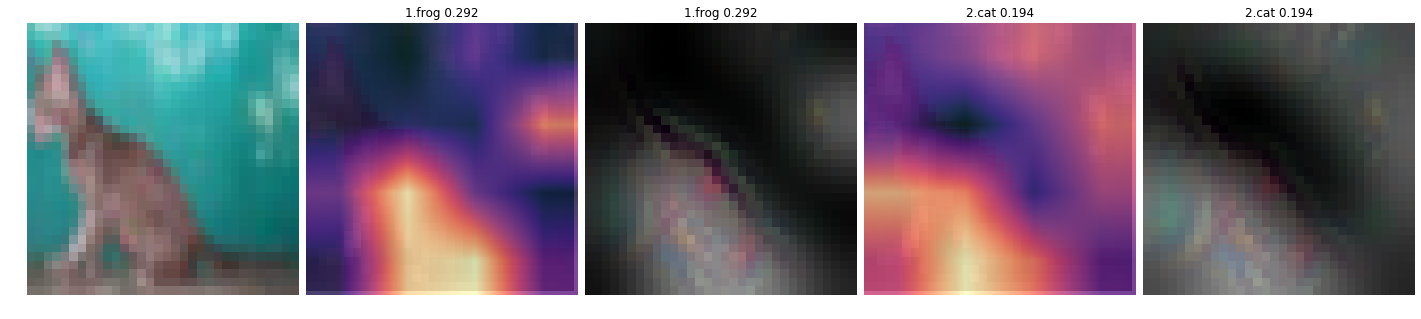

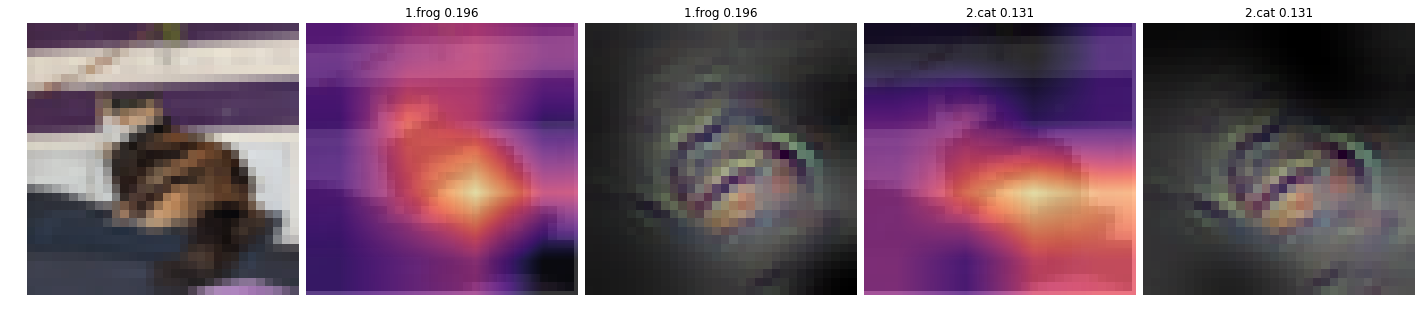

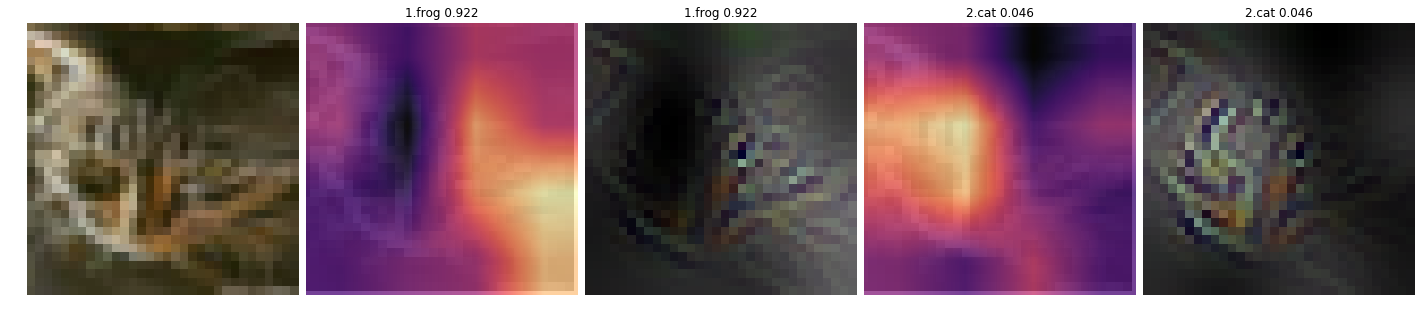

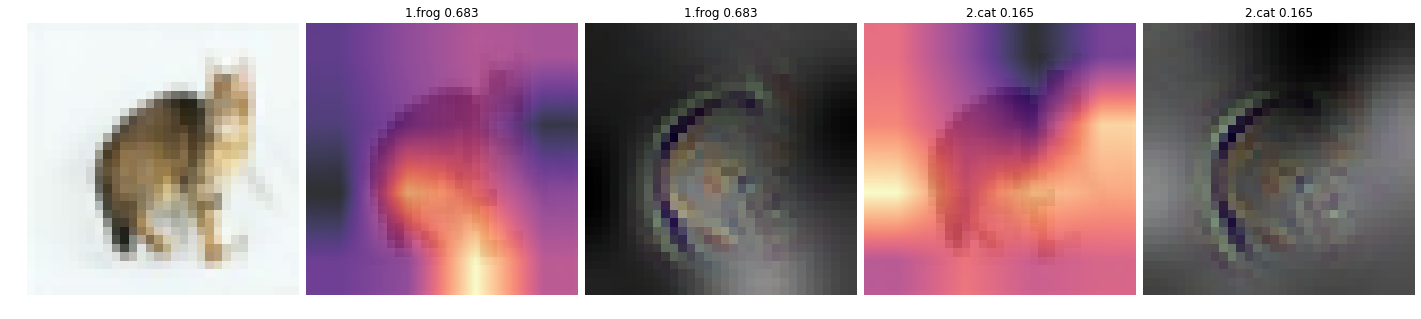

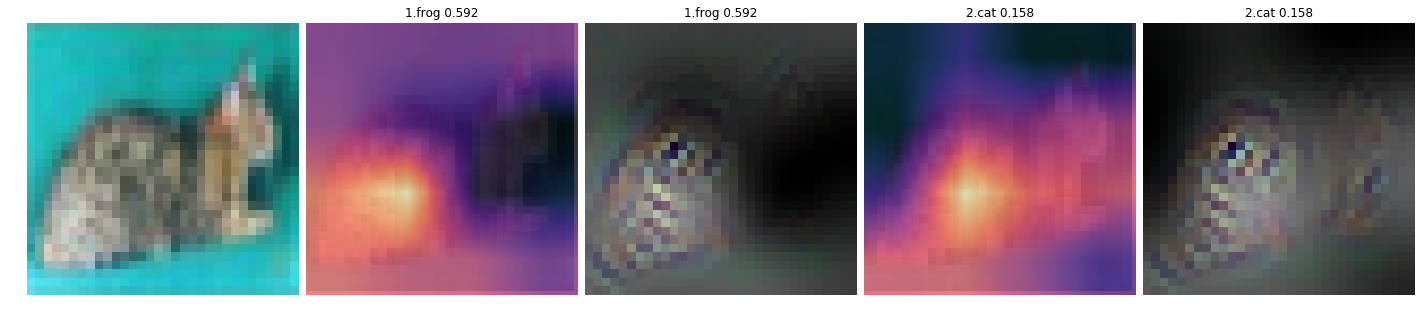

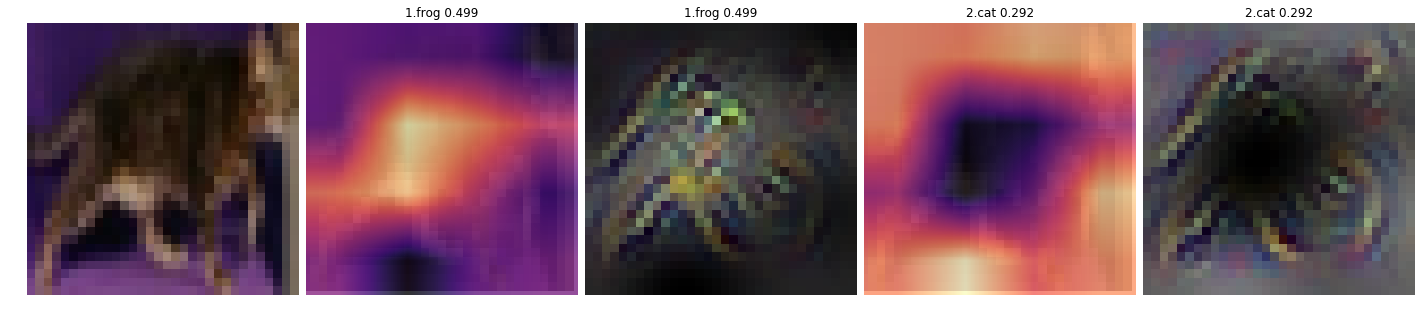

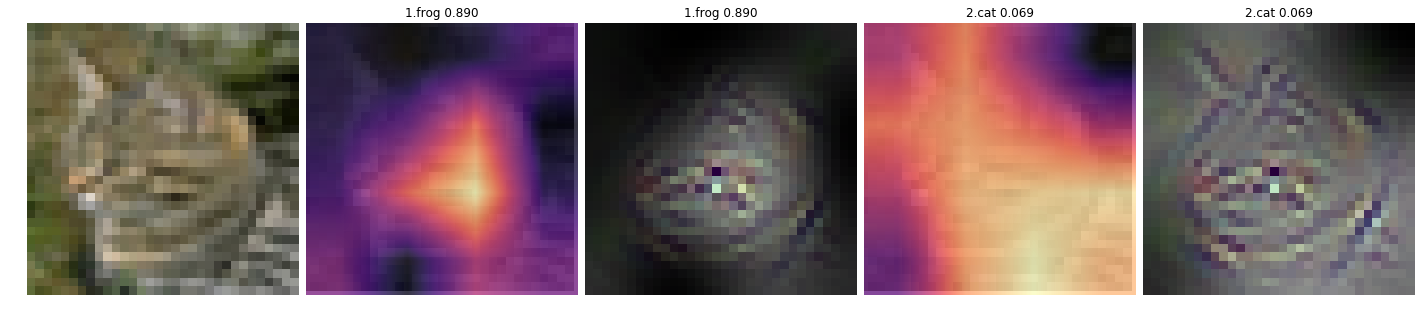

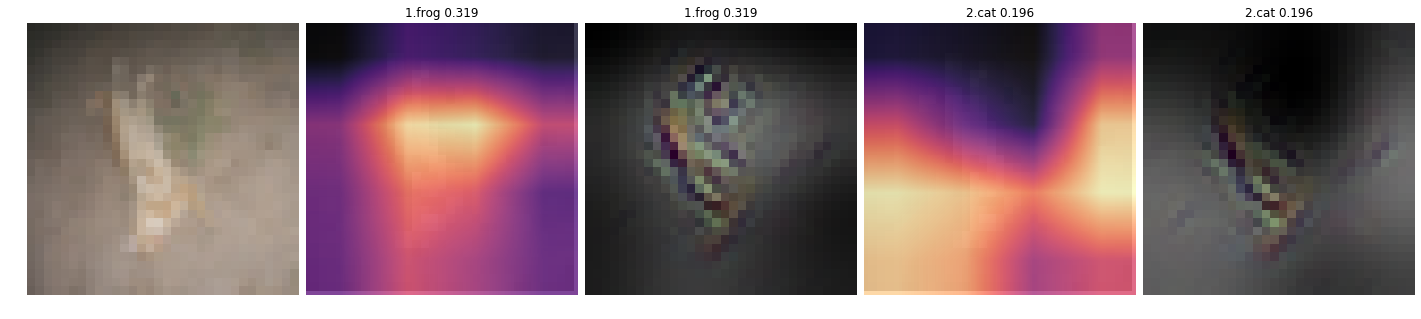

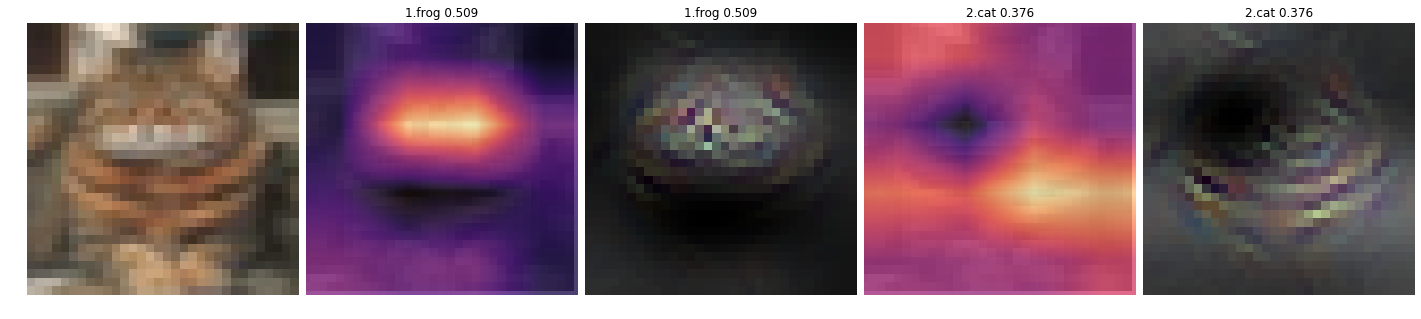

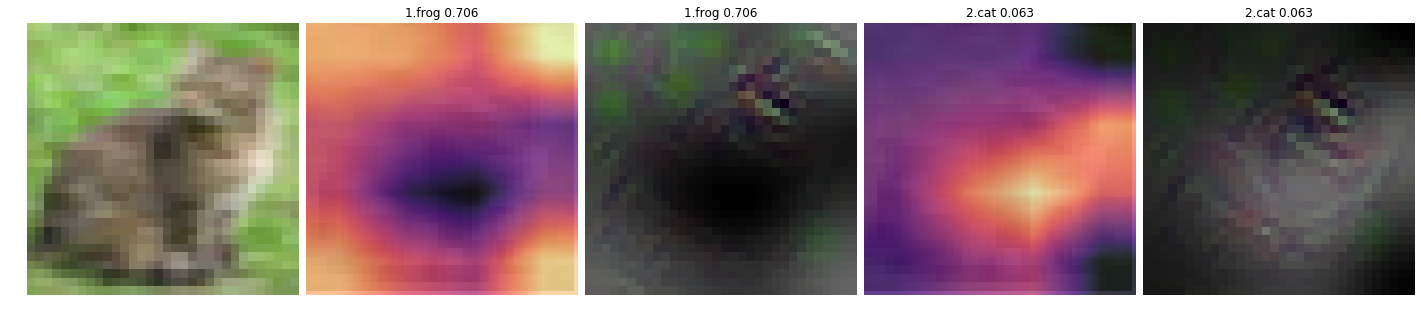

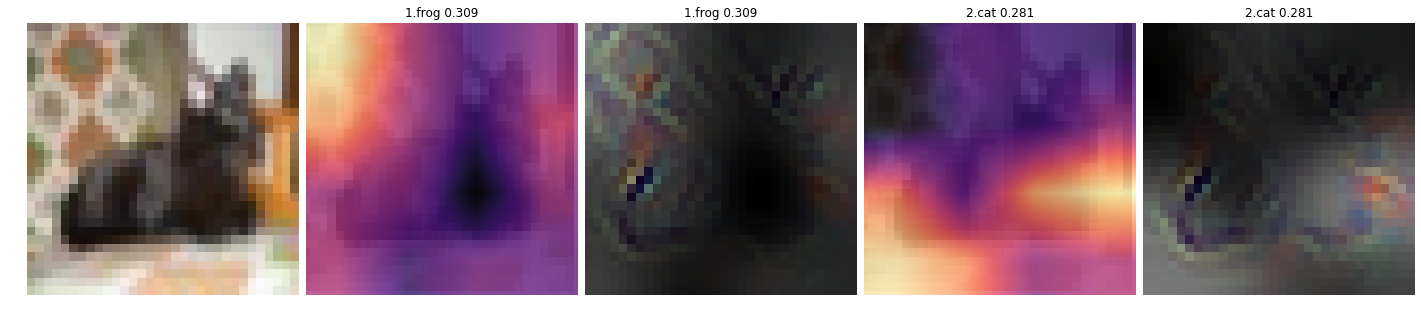

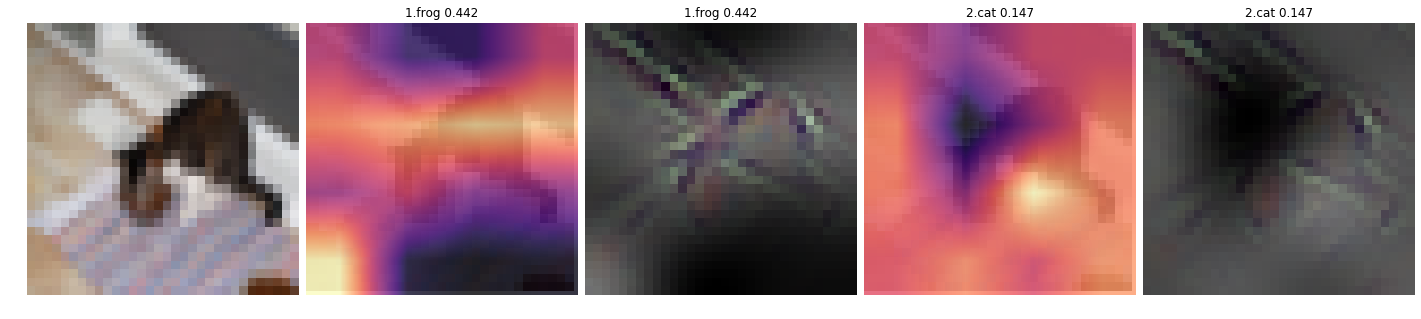

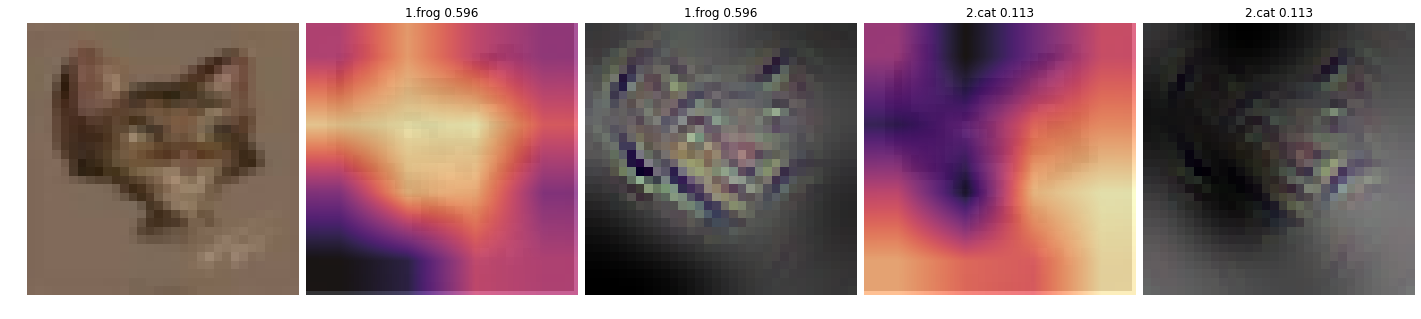

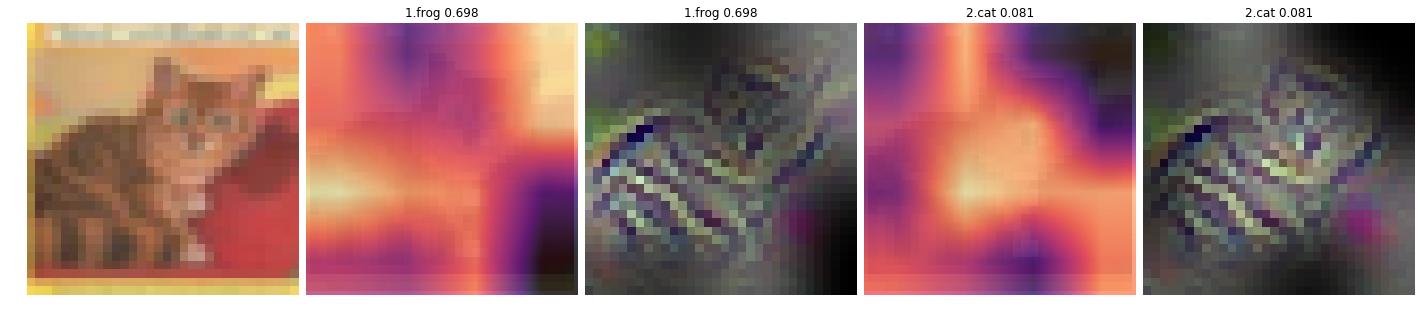

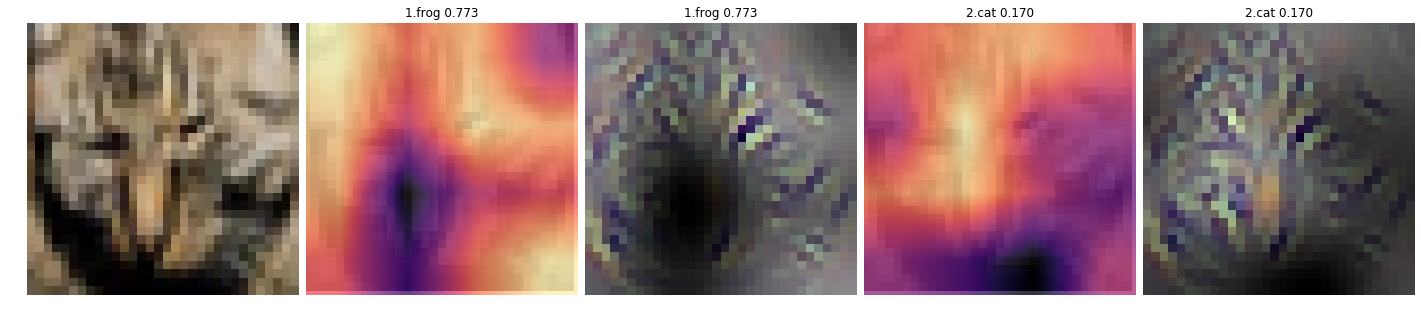

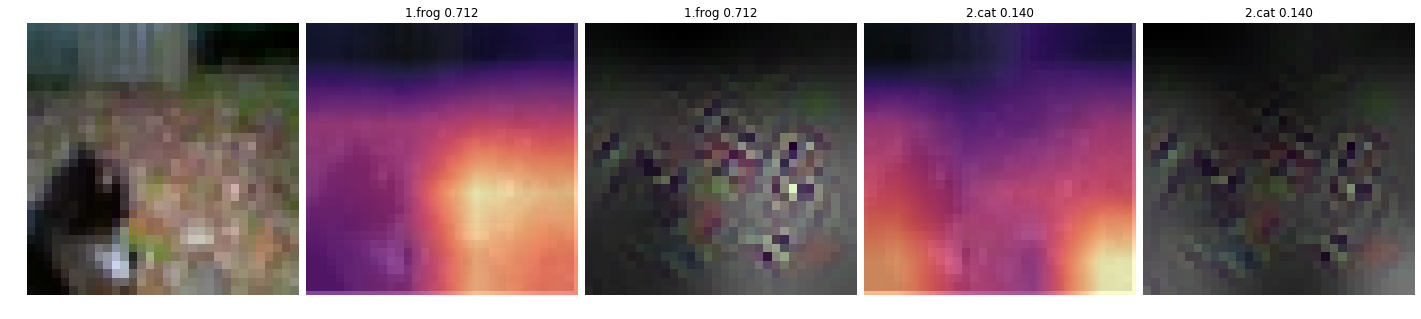

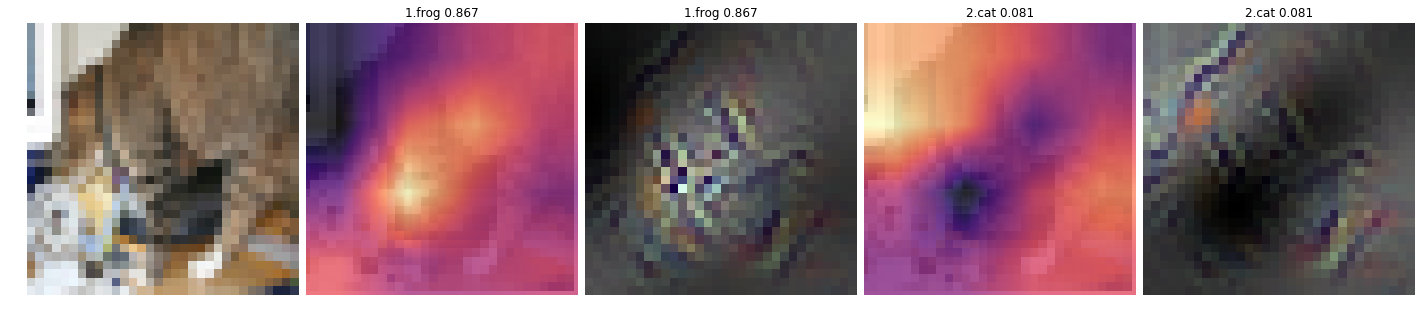

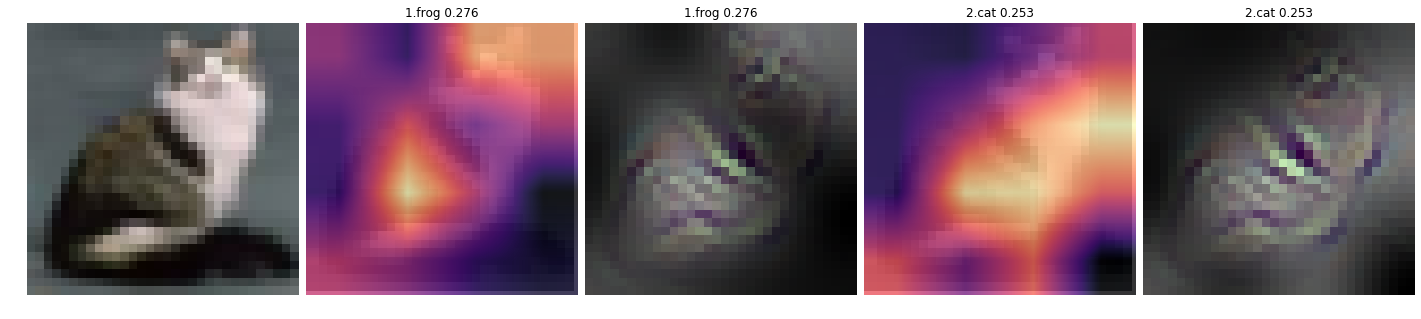

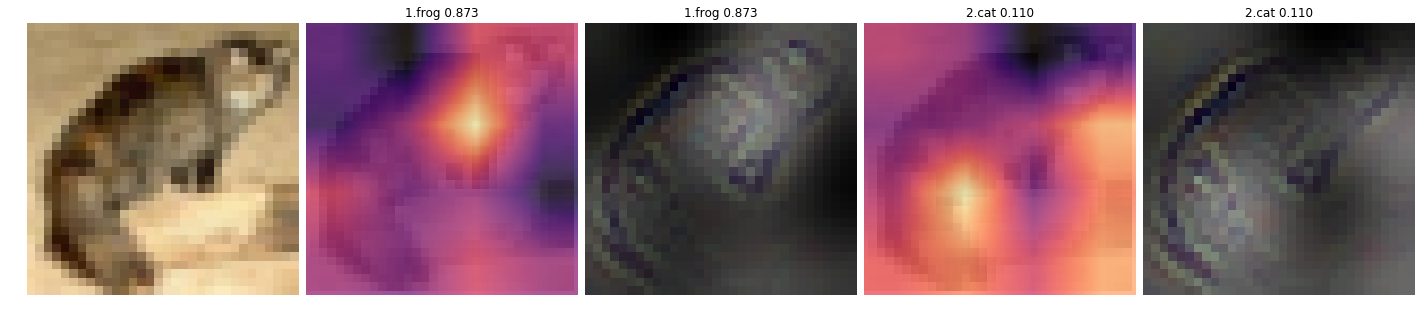

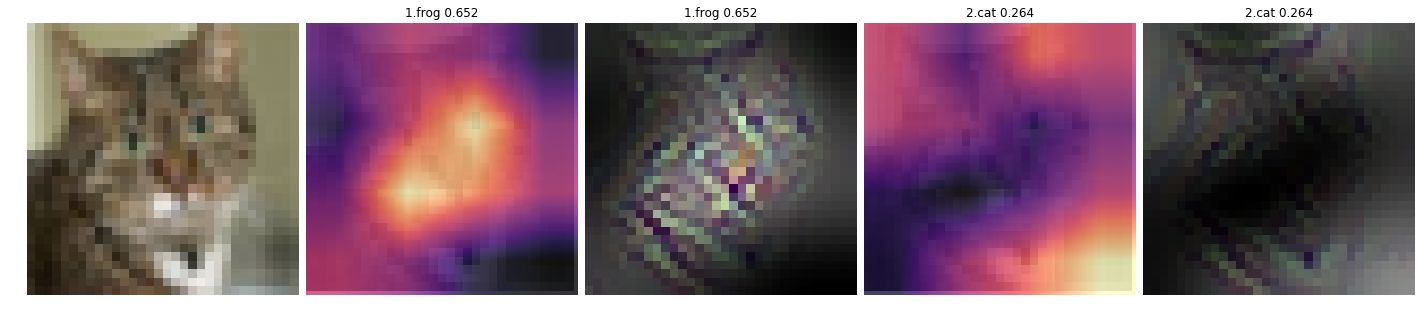

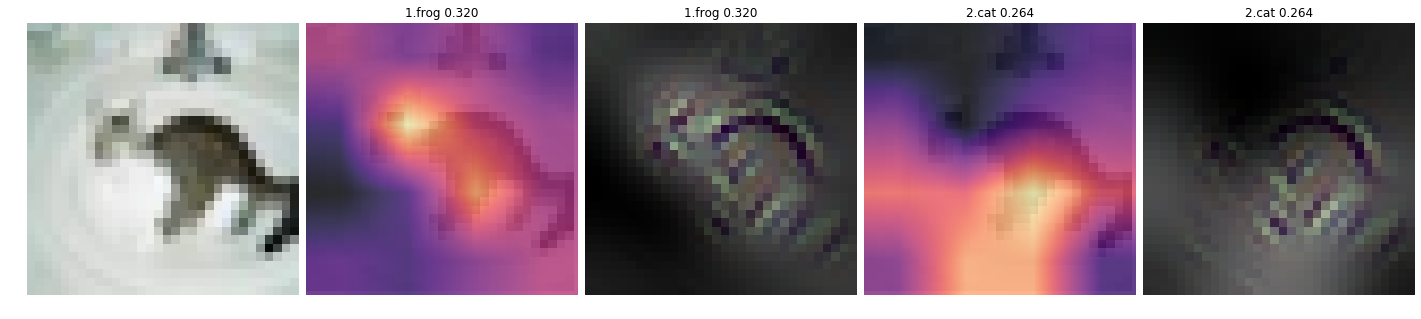

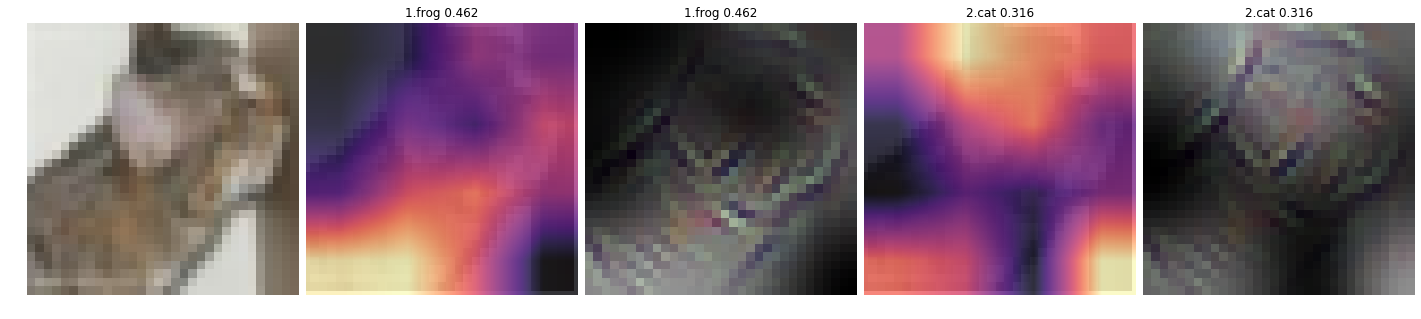

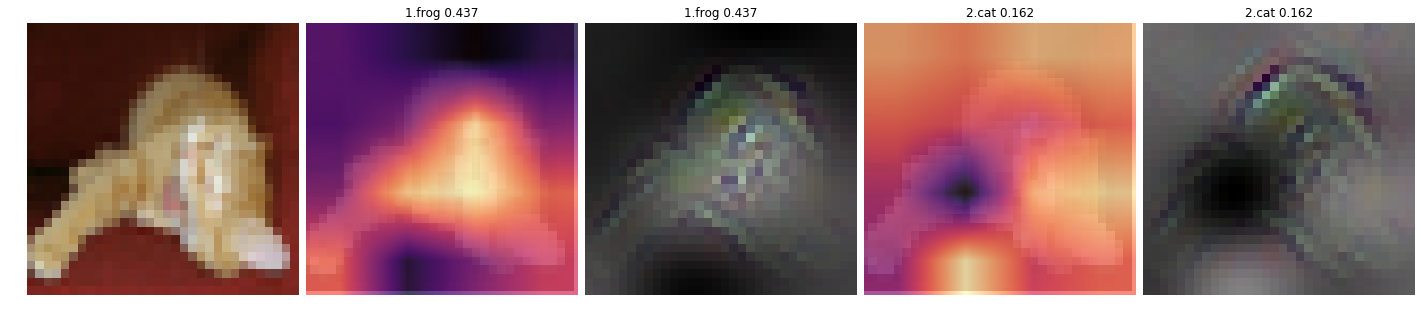

In [29]:
for idx in mismatch_idxs[:50]:
    gcam = GradCam.from_interp(learn,interp,idx,ds_type = DatasetType.Valid,include_label=True)
    gcam.plot()